In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import math as mt
import datetime as dt
from sklearn.cluster import KMeans
import random as ran
from sklearn.metrics.pairwise import euclidean_distances as euc
from functools import reduce

# 한글출력
matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

from src import crs
from IPython.display import clear_output, Markdown, display

In [3]:
# 1. load_excel

# data/apt_all.xlsx
# data/apt_1.xlsx
# data/apt_3.xlsx
# data/apt_4.xlsx
# data/apt_std_nugin_1_3.xlsx

data_path = "data/apt_1.xlsx"
xlsx = pd.read_excel(data_path, header=None,
                     skiprows=2, engine="openpyxl")

In [5]:
# 2. data preprocessing
p, m = crs.utils.data_preprocessing(xlsx)

m.set_index("month", inplace=True)
m.head()

/Users/formegusto/Desktop/idoformegusto/development/research/what-is-public-fee/src/crs/utils/data_preprocessing.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  datas_df[household_name] = household_df[col][3:].to_list()
/Users/formegusto/Desktop/idoformegusto/development/research/what-is-public-fee/src/crs/utils/data_preprocessing.py:49: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  month_usage_df[name] = [


,아파트1-101-1002,아파트1-101-104,아파트1-101-1102,아파트1-101-1202,아파트1-101-1302,아파트1-101-1401,아파트1-101-1403,아파트1-101-1502,아파트1-101-1504,아파트1-101-1602,...,아파트1-104-303,아파트1-104-404,아파트1-104-408,아파트1-104-503,아파트1-104-507,아파트1-104-606,아파트1-104-705,아파트1-104-708,아파트1-104-902,아파트1-104-905
month,,,,,,,,,,,,,,,,,,,,,
1,253,689,183,239,455,343,380,219,389,350,...,10,111,39,151,181,180,290,184,176,148
2,251,481,177,218,397,297,339,197,348,288,...,77,107,30,114,151,151,263,177,158,127
3,255,424,203,222,378,303,349,202,357,368,...,77,120,28,116,163,157,281,182,171,127
4,252,355,180,230,368,278,298,188,346,365,...,76,64,58,109,151,148,257,175,140,121
5,230,357,258,203,414,270,418,156,320,265,...,150,63,75,137,115,13,84,149,36,117


In [7]:
_month = 1

month_df = pd.DataFrame(m.loc[_month])
month_df.reset_index(inplace=True)

month_df.columns = ['name', 'usage (kWh)']

households_kWh = month_df['usage (kWh)'].sum()
PUBLIC_PERCENTAGE = 30
APT = round((households_kWh * 100) / (100 - PUBLIC_PERCENTAGE))

hh, anal = crs.utils.get_analysis_df(_month,month_df, APT)
anal

,기본요금,전력량요금,환경 기후금,연료비 조정액,VAT,전력산업기반기금,기본요금 + 전력량요금
APT,654480,4907088,235224,-133164,566363,209550,5561568
세대부,197480,3118820,164805,-93312,334205,123150,3316300
공용부,457000,1788268,70419,-39852,232158,86400,2245268
세대부 / APT percentage,30,64,70,70,59,59,60
공용부 / APT percentage,70,36,30,30,41,41,40


### 수거해 간다라는 의미

In [10]:
crs.utils.print_apt_info(_month, month_df, APT)
pd.DataFrame(anal['전력량요금'])

APT : 44,434kWh (평균 사용량: 411kWh)
		6,439,540원
세대부 : 31,104kWh (70%) (평균 사용량: 288kWh)
		3,798,980원
공용부 : 13,330kWh (30%) (평균 사용량: 123kWh)
		2,640,560원


,전력량요금
APT,4907088
세대부,3118820
공용부,1788268
세대부 / APT percentage,64
공용부 / APT percentage,36


In [37]:
collect_pd = pd.DataFrame(((month_df['usage (kWh)'] / 411) * 100).round().astype("int"))
collect_pd.index = month_df['name']
collect_pd.columns = ['수거율 (%)']

display(Markdown("**세대부 평균 수거율은 {}% 입니다.**".format(
    round(collect_pd['수거율 (%)'].mean())
)))
collect_pd.head()

**세대부 평균 수거율은 70% 입니다.**

,수거율 (%)
name,
아파트1-101-1002,62
아파트1-101-104,168
아파트1-101-1102,45
아파트1-101-1202,58
아파트1-101-1302,111


In [12]:
crs.utils.print_apt_info(_month, month_df, APT)
display(Markdown("**(+) 세대부 평균 수거율 : {}%**".format(
    format(
        round((month_df['usage (kWh)'] / 411).mean() * 100),
        ","
    )
)))

APT : 44,434kWh (평균 사용량: 411kWh)
		6,439,540원
세대부 : 31,104kWh (70%) (평균 사용량: 288kWh)
		3,798,980원
공용부 : 13,330kWh (30%) (평균 사용량: 123kWh)
		2,640,560원


**(+) 세대부 평균 수거율 : 70%**

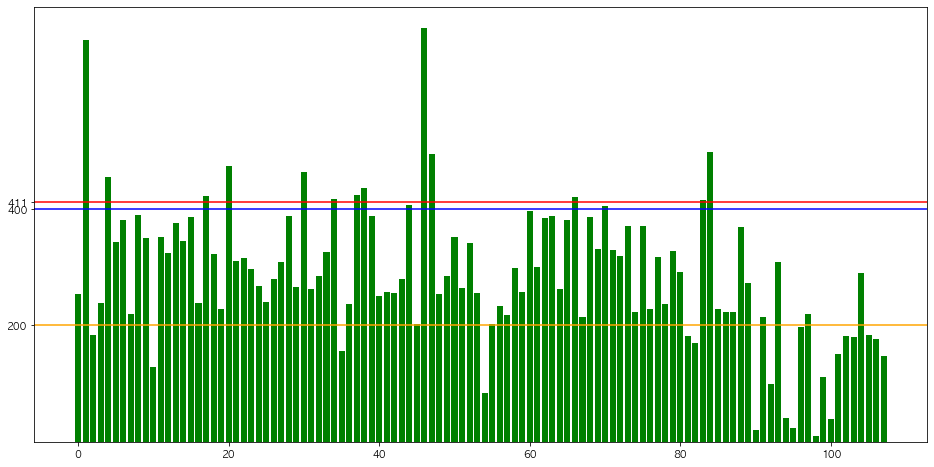

In [55]:
plt.figure(figsize=(16,8))

plt.bar(month_df.index, month_df['usage (kWh)'], color='g',label="가구 별 수거 사용량")
plt.axhline(411, label="가구 별 수거해야 하는 사용량", color='r')

plt.axhline(400, label="누진 2단계", color='b')
plt.axhline(200, label="누진 1단계", color='orange')

plt.yticks([200, 400, 411])
# plt.legend()

plt.show()

In [56]:
surplus = pd.DataFrame(month_df['usage (kWh)'])
surplus.index = month_df['name']

# 1단계 잉여자원
surplus['1단계'] = (surplus['usage (kWh)'] - 200).map(lambda x:
                                                0 if x >= 0 else x * -1)

In [140]:
nugin_1 = [len(month_df[month_df['usage (kWh)'] >= 200]),
           len(month_df[month_df['usage (kWh)'] < 200])]

collect_rate = pd.DataFrame(nugin_1).T
collect_rate.columns = ['전체 수거 완료 가구 수', '수거 미 완료 가구 수']
collect_rate['수거되지 못한 사용량'] = (collect_rate['수거 미 완료 가구 수'] * 200) - (month_df[month_df['usage (kWh)'] < 200]['usage (kWh)'].sum())
collect_rate.index = ['누진 1단계']

collect_rate

,전체 수거 완료 가구 수,수거 미 완료 가구 수,수거되지 못한 사용량
누진 1단계,88,20,1539


In [141]:
_month_df = month_df.copy()
_month_df['usage (kWh)'] = month_df['usage (kWh)'].map(lambda x: x - 200 if x > 200 else 0)

nugin_2 = pd.Series([len(month_df[month_df['usage (kWh)'] >= 400]),
           len(month_df[month_df['usage (kWh)'] < 400])], index=['전체 수거 완료 가구 수', '수거 미 완료 가구 수'],
                   name="누진 2단계")
nugin_2['수거되지 못한 사용량'] = (nugin_2['수거 미 완료 가구 수'] * 200) - (_month_df[_month_df['usage (kWh)'] < 200]['usage (kWh)'].sum())
collect_rate = collect_rate.append(
        nugin_2)

collect_rate

,전체 수거 완료 가구 수,수거 미 완료 가구 수,수거되지 못한 사용량
누진 1단계,88,20,1539
누진 2단계,15,93,11684


In [142]:
_month_df['usage (kWh)'] = _month_df['usage (kWh)'].map(lambda x: x - 200 if x > 200 else 0)
nugin_3 = pd.Series([len(month_df[month_df['usage (kWh)'] >= 411]),
           len(month_df[month_df['usage (kWh)'] < 411])], index=['전체 수거 완료 가구 수', '수거 미 완료 가구 수'],
                   name="누진 3단계")
nugin_3['수거되지 못한 사용량'] = (nugin_3['수거 미 완료 가구 수'] * 11) - (_month_df[_month_df['usage (kWh)'] < 11]['usage (kWh)'].sum())
collect_rate = collect_rate.append(
        nugin_3)

collect_rate

,전체 수거 완료 가구 수,수거 미 완료 가구 수,수거되지 못한 사용량
누진 1단계,88,20,1539
누진 2단계,15,93,11684
누진 3단계,13,95,1034


[88, 20]

In [154]:
last_nugin = pd.Series([
    collect_rate.loc['누진 1단계']['수거되지 못한 사용량'],
    collect_rate.loc['누진 2단계']['수거되지 못한 사용량'],
    collect_rate['수거되지 못한 사용량']['누진 3단계'] - (month_df[month_df['usage (kWh)'] > 411]['usage (kWh)'] - 411).sum()
])

collect_rate['최종 잉여 사용량'] = last_nugin.values.astype("int")
collect_rate

,전체 수거 완료 가구 수,수거 미 완료 가구 수,수거되지 못한 사용량,최종 잉여 사용량
누진 1단계,88,20,1539,1539
누진 2단계,15,93,11684,11684
누진 3단계,13,95,1034,61


973

In [125]:
_month_df['usage (kWh)'] = month_df['usage (kWh)'].map(lambda x: x - 200 if x > 200 else 0).map(
    lambda x: 11 - x if x > 11 else x
)
                                                      x - 200 if x > 200 else 0
                                                      )

In [138]:
_month_df

,name,usage (kWh)
0,아파트1-101-1002,0
1,아파트1-101-104,289
2,아파트1-101-1102,0
3,아파트1-101-1202,0
4,아파트1-101-1302,55
...,...,...
103,아파트1-104-606,0
104,아파트1-104-705,0
105,아파트1-104-708,0
106,아파트1-104-902,0


In [134]:
month_df

,name,usage (kWh)
0,아파트1-101-1002,253
1,아파트1-101-104,689
2,아파트1-101-1102,183
3,아파트1-101-1202,239
4,아파트1-101-1302,455
...,...,...
103,아파트1-104-606,180
104,아파트1-104-705,290
105,아파트1-104-708,184
106,아파트1-104-902,176
